<div align="center">
    <h3> Solar System Simulator </h3>
</div>

<div>

<p>We wish to create a program to simulate various types of solar systems and general gravitational interactions. We should start with a star and single planet system, then work our way toward multiplanet systems. We will add such things like elliptical orbits and binary star systems. To make the simulations generalisable, we will develop a class system in order to instantiate each object. 
</p>

<p>
Other goals will be to create plots and gifs of the systems. We can also develop long time simulations if our code is efficient. Initiating each solar system with various initial conditions will allow us to do some data science. 
</p>

<p>
Eventually we will want to tend toward N-body simulations!  
</p>
</div>

<p>
ETH Sols: C:\Users\brian\Documents\ETHZurich\MScPhysics\Semester1\IntroductionToComputationalPhysics\Exercise11\sol11\solution11.jl  and  C:\Users\brian\Documents\ETHZurich\MScPhysics\Semester1\IntroductionToComputationalPhysics\Exercise11\sol11\solution11.ipynb
</p>

--- 

In [2]:
import numpy as np
from scipy import integrate 
import matplotlib.pyplot as plt 
import scipy.integrate as integrate 
from scipy.integrate import quad 
import scipy.special as special 

In [238]:
class Body:
    def __init__(self, name, mass, position, velocity, accel):
        """
        Here we initialise the star object with parameters.
        """
        self.name = name
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.accel = np.array(accel)

    # Plotting Function. 
    def plot(self, ax):
        names = ["Sun", "Earth" ]
        clrs = ["yellow", "blue" ]  
        sizes = [50, 20]
        
        try: 
            idx = names.index(self.name)
            color = clrs[idx] 
            size = sizes[idx] 
        except ValueError: 
            color = "C"+str(np.random.randint(15))
            size = 20 

        x, y = self.position 
        ax.scatter(x, y, c=color, s=size, label=self.name)
        if self.name:
            ax.legend(loc="best", fontsize=10)

In [239]:
''' 
# Define plotting function

def PlotAll( objects, lim_val=7):
    # Plot. 
    fig, ax = plt.subplots(figsize=(5,5))
    ax.grid(True)

    # Create instances.     
    #Sun = Star(mass=1000, position=(0,0), name="Sun")  
    #Earth = Planet(mass=1, position=(1,0), name="Earth") 
    for 
        Sun.plot(ax) #, label="Sun")
        Earth.plot(ax)

    ax.set_xlim(-lim_val, lim_val)
    ax.set_ylim(-lim_val, lim_val) 
    ax.set_title("The Solar System")

Universe = {
    "Stars": [ Star(mass=1000, position=(0,0), name="Sun") ] , 
    "Planets": [ Planet(mass=1, position=(1,0), name="Earth") ] ,
} 
''' 

' \n# Define plotting function\n\ndef PlotAll( objects, lim_val=7):\n    # Plot. \n    fig, ax = plt.subplots(figsize=(5,5))\n    ax.grid(True)\n\n    # Create instances.     \n    #Sun = Star(mass=1000, position=(0,0), name="Sun")  \n    #Earth = Planet(mass=1, position=(1,0), name="Earth") \n    for \n        Sun.plot(ax) #, label="Sun")\n        Earth.plot(ax)\n\n    ax.set_xlim(-lim_val, lim_val)\n    ax.set_ylim(-lim_val, lim_val) \n    ax.set_title("The Solar System")\n\nUniverse = {\n    "Stars": [ Star(mass=1000, position=(0,0), name="Sun") ] , \n    "Planets": [ Planet(mass=1, position=(1,0), name="Earth") ] ,\n} \n'

In [240]:
# Function to calculate forces without the masses. 

def CalcForce(body1, body2): # bodies is a vector of all the universe bodies. 
    G = 0.01 
    r = np.array( body1.position ) - np.array( body2.position )
    d = np.linalg.norm( r )
    f =  - G * r / d**3  
    return f 

# Converted to acceleration by F=ma. 
def CalcAccel(bodies):
    accelerations = []
    N = len(bodies)
    for i in range(N):
        accel = np.zeros(2)  # 2D acceleration (x, y)
        for j in range(N):
            if i != j:  # Avoid self-interaction
                f = CalcForce(bodies[i], bodies[j])
                accel += f * bodies[j].mass
        accelerations.append(accel)
    return accelerations

In [241]:
# Create instances.  
Sun = Body(name="Sun", mass=10_000, position=[0,0], velocity=[0,0], accel=[0,0])  #Star
Earth = Body(name="Earth", mass=1, position=[1,0], velocity=[0,0], accel=[0,0]) #Planet
#Jibbi = Body(name="Jibbi", mass=10, position=[5,0], velocity=[0,0], accel=[0,0]) 

# Add into Universe. 
Universe = [Sun, Earth]#, Jibbi]

CalcAccel(Universe)

[array([0.01, 0.  ]), array([-100.,    0.])]

In [251]:
# Function to calculate a timestep. 

def TimeStep(bodies, tstep):

    init_x = np.array( [b.position for b in bodies] )
    init_v = np.array( [b.velocity for b in bodies] ) 
    init_a = np.array( CalcAccel(bodies) ) 

    RK1_x = init_v
    RK1_v = init_a

    RK2_x = init_x + 0.5 * tstep * RK1_x  
    RK2_v = init_v + 0.5 * tstep * RK1_v  

    RK3_x = init_x + 0.5 * tstep * RK2_x
    RK3_v = init_v + 0.5 * tstep * RK2_v 

    RK4_x = init_x + tstep * RK3_x
    RK4_v = init_v + tstep * RK3_v 

    final_x = init_x + ( RK1_x + 2*RK2_x + 2*RK3_x + RK4_x ) * tstep / 6 
    final_v = init_v + ( RK1_v + 2*RK2_v + 2*RK3_v + RK4_v ) * tstep / 6 

    # Update the bodies
    for i, b in enumerate(bodies):
        b.position = final_x[i]
        b.velocity = final_v[i]
        #b.accel = init_a[i]  


In [252]:
# Simulation function. 

def Simulate(bodies, tstep, maxT): 

    trajectories = {body.name: [] for body in bodies}

    time = 0
    while time < maxT:
        for body in bodies:
            trajectories[body.name].append( body.position.copy() )
        TimeStep(bodies, tstep)
        time += tstep 
        
    for name in trajectories:
        trajectories[name] = np.array( trajectories[name] ) 

    return trajectories 

In [253]:
# Create instances.  
Sun = Body(name="Sun", mass=10_000, position=[0,0], velocity=[0,0], accel=[0,0])  #Star
Earth = Body(name="Earth", mass=1, position=[1,0], velocity=[0,0], accel=[0,0]) #Planet
#Jibbi = Body(name="Jibbi", mass=10, position=[5,0], velocity=[0,0], accel=[0,0]) 

# Add into Universe. 
Universe = [Sun, Earth]#, Jibbi]

ts = np.arange( 0, 1, 0.001 )

res1 = Simulate(Universe, tstep=0.001, maxT=1)

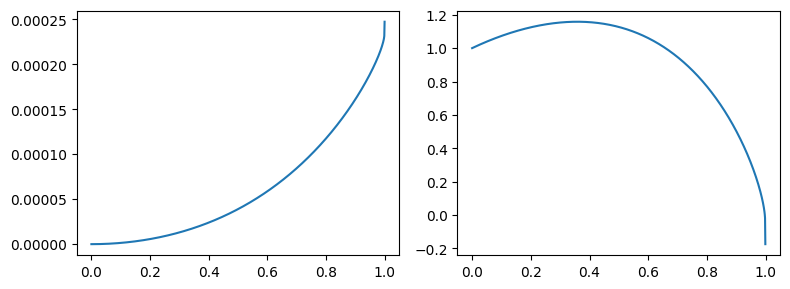

In [254]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1) 
plt.plot(ts, res1["Sun"][:,0] )

plt.subplot(1,2,2)
plt.plot(ts, res1["Earth"][:,0] )

plt.tight_layout()

In [168]:
# Create instances.  
Sun = Body(name="Sun", mass=10_000, position=[0,0], velocity=[0,0], accel=[0,0])  #Star
Earth = Body(name="Earth", mass=1, position=[1,0], velocity=[0,0], accel=[0,0]) #Planet
#Jibbi = Body(name="Jibbi", mass=10, position=[5,0], velocity=[0,0], accel=[0,0]) 

# Add into Universe. 
Universe = [Sun, Earth]#, Jibbi]

print("Check initial force pairs") 
for i in range(0,len(Universe)):
    for j in range(i+1, len(Universe)):
        print(CalcForce(Universe[i], Universe[j]))
print("")

print("---")

print("Before Run:")
for b in Universe:
    print(b.velocity) 

TimeStep(Universe, tstep=0.001)  

print("After Run:")
for b in Universe:
    print(b.velocity) 

Check initial force pairs
[-0.01 -0.  ]

---
Before Run:
[0 0]
[0 0]
After Run:
[1.66833417e-06 0.00000000e+00]
[-0.01668334  0.        ]


In [169]:
# Function to simulate the passage of events. Start with a stack of subplot grids. Then make a vide/gif out of it.  


Text(0.5, 1.0, 'The Solar System')

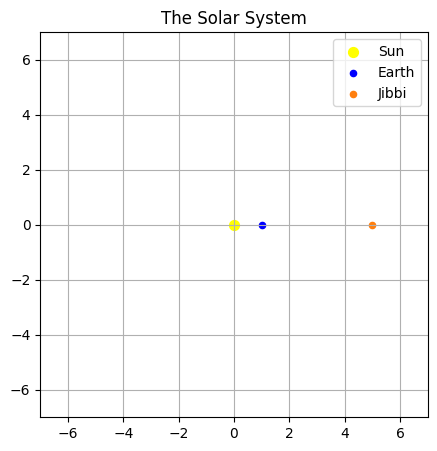

In [170]:
# Plot. 
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(True)

# Create instances.  
Sun = Body(name="Sun", mass=10_000, position=[0,0], velocity=[0,0], accel=[0,0])  #Star
Earth = Body(name="Earth", mass=1, position=[1,0], velocity=[0,0], accel=[0,0]) #Planet
Jibbi = Body(name="Jibbi", mass=10, position=[5,0], velocity=[0,0], accel=[0,0]) 

# Add into Universe. 
Universe = [Sun, Earth, Jibbi]

for body in Universe:
    body.plot(ax)
    #Sun.plot(ax) #, label="Sun")
    #Earth.plot(ax)
    #Jibbi.plot(ax)

lim_val = 7
ax.set_xlim(-lim_val, lim_val)
ax.set_ylim(-lim_val, lim_val) 
ax.set_title("The Solar System")

## Rough 2

In [1]:
class Body:
    def __init__(self, name, mass, position, velocity, accel):
        """
        Here we initialise the star object with parameters.
        """
        self.name = name
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.accel = np.array(accel)

    # Plotting Function. 
    def plot(self, ax):
        names = ["Sun", "Earth" ]
        clrs = ["yellow", "blue" ]  
        sizes = [50, 20]
        
        try: 
            idx = names.index(self.name)
            color = clrs[idx] 
            size = sizes[idx] 
        except ValueError: 
            color = "C"+str(np.random.randint(15))
            size = 20 

        x, y = self.position 
        ax.scatter(x, y, c=color, s=size, label=self.name)
        if self.name:
            ax.legend(loc="best", fontsize=10)

# Function to calculate forces without the masses. 

def CalcForce(body1, body2): # bodies is a vector of all the universe bodies. 
    G = 0.00001 
    r = np.array( body1.position ) - np.array( body2.position )
    d = np.linalg.norm( r )
    f =  - G * r / d**3  
    return f 

# Converted to acceleration by F=ma. 
def CalcAccel(bodies):
    accelerations = []
    N = len(bodies)
    for i in range(N):
        accel = np.zeros(2)  # 2D acceleration (x, y)
        for j in range(N):
            if i != j:  # Avoid self-interaction
                f = CalcForce(bodies[i], bodies[j])
                accel += f * bodies[j].mass
        accelerations.append(accel)
    return accelerations

def TimeStep(bodies, tstep):

    Euler_x = np.array( [b.position for b in bodies] )
    Euler_v = np.array( [b.velocity for b in bodies] )
    Euler_a = np.array( CalcAccel(bodies) )

    final_x = np.array( [Euler_x[i] + tstep * Euler_v[i] for i in range(len(bodies)) ] )
    final_v = np.array( [Euler_v[i] + tstep * Euler_a[i] for i in range(len(bodies)) ] )

    # Update the bodies
    for i, b in enumerate(bodies):
        b.position = final_x[i]
        b.velocity = final_v[i]

# Simulation function. 

def Simulate(bodies, tstep, maxT, plot=False): 

    trajectories = {body.name: [] for body in bodies}

    times = []
    time = 0
    while time < maxT:
        times.append(time)
        for body in bodies:
            trajectories[body.name].append( body.position.copy() )
        TimeStep(bodies, tstep)
        time += tstep 
        
    for name in trajectories:
        trajectories[name] = np.array( trajectories[name] ) 

    return [times, trajectories]

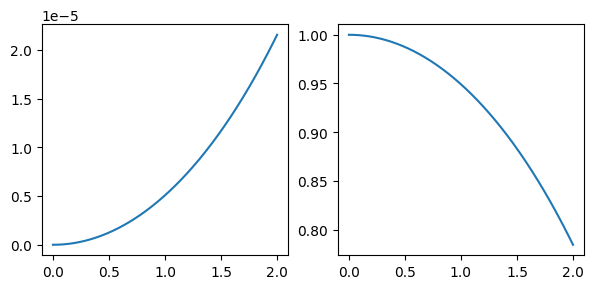

In [3]:
# Create instances.  
Sun = Body(name="Sun", mass=10_000, position=[0,0], velocity=[0,0], accel=[0,0])  #Star
Earth = Body(name="Earth", mass=1, position=[1,0], velocity=[0,0], accel=[0,0]) #Planet

# Add into Universe. 
Universe = [Sun, Earth]#, Jibbi]

# Simulation 
ts, res1 = Simulate(Universe, tstep=0.001, maxT=2, plot=True)


# Plot
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
plt.plot(ts, res1["Sun"][:,0])

plt.subplot(1,2,2)
plt.plot(ts, res1["Earth"][:,0])

## Rough 3 

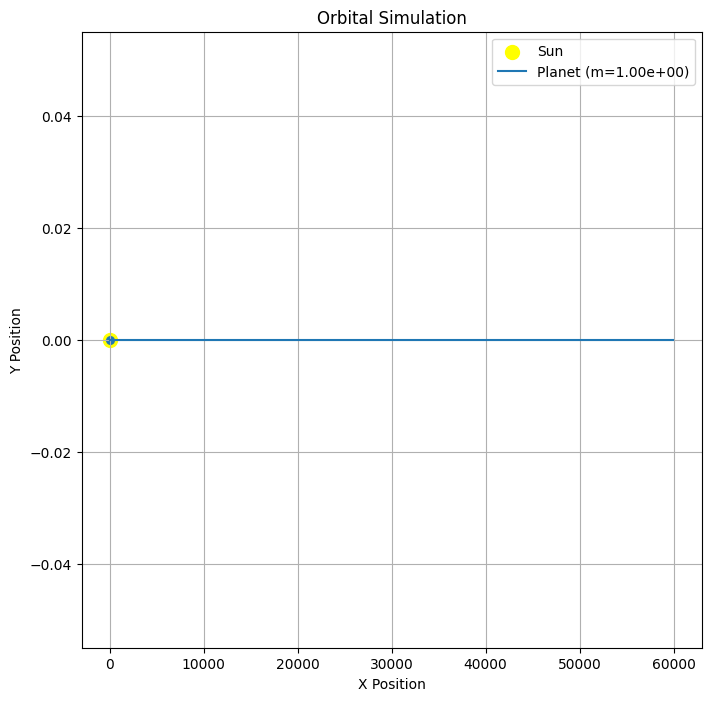

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

class Sun:
    """Represents a star at the center of the simulation."""
    def __init__(self, mass: float, position: np.ndarray = np.array([0.0, 0.0]), velocity: np.ndarray = np.array([0.0, 0.0])):
        """
        Initializes the Sun.

        Args:
            mass (float): The mass of the sun.
            position (np.ndarray): The initial 2D position of the sun [x, y]. Defaults to [0, 0].
            velocity (np.ndarray): The initial 2D velocity of the sun [vx, vy]. Defaults to [0, 0].
        """
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)

    def __repr__(self):
        return f"Sun(mass={self.mass:.2e}, position={self.position}, velocity={self.velocity})"


class Body:
    """Represents a planet or other orbiting body."""
    def __init__(self, mass: float, position: np.ndarray, velocity: np.ndarray):
        """
        Initializes the Body.

        Args:
            mass (float): The mass of the body.
            position (np.ndarray): The initial 2D position of the body [x, y].
            velocity (np.ndarray): The initial 2D velocity of the body [vx, vy].
        """
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.trajectory = [self.position.copy()]  # Store the trajectory

    def __repr__(self):
        return f"Body(mass={self.mass:.2e}, position={self.position}, velocity={self.velocity})"


def gravitational_force(body1: Body, body2: Body, G: float = 1.0) -> np.ndarray:
    """
    Calculates the gravitational force exerted by body2 on body1.

    Args:
        body1 (Body): The body experiencing the force.
        body2 (Body): The body exerting the force.
        G (float): The gravitational constant. Defaults to 1.0.

    Returns:
        np.ndarray: The 2D force vector acting on body1.
    """
    r_vec = body2.position - body1.position
    distance_sq = np.sum(r_vec**2)
    distance = np.sqrt(distance_sq)
    if distance > 0:
        force_magnitude = (G * body1.mass * body2.mass) / distance_sq
        force_vector = force_magnitude * (r_vec / distance)
        return force_vector
    else:
        return np.array([0.0, 0.0])



def acceleration(body: Body, system: List[Body or Sun], G: float = 1.0) -> np.ndarray:
    """
    Calculates the net acceleration on a body due to all other bodies in the system.

    Args:
        body (Body): The body for which to calculate acceleration.
        system (list): A list of all bodies in the simulation (including the sun).
        G (float): The gravitational constant. Defaults to 1.0.

    Returns:
        np.ndarray: The 2D acceleration vector of the body.
    """
    net_force = np.array([0.0, 0.0])
    for other_body in system:
        if body != other_body:
            net_force += gravitational_force(body, other_body, G)
    return net_force / body.mass



def rk4_step(body: Body, system: List[Body or Sun], dt: float, G: float = 1.0) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs one step of the Runge-Kutta 4th order method to update the body's state.

    Args:
        body (Body): The body to update.
        system (list): A list of all bodies in the simulation.
        dt (float): The time step.
        G (float): The gravitational constant. Defaults to 1.0.

    Returns:
        tuple: The change in position (dpos) and change in velocity (dvel) for this step.
    """
    def derivative(current_body: Body) -> Tuple[np.ndarray, np.ndarray]:
        return current_body.velocity, acceleration(current_body, system, G)

    k1_v, k1_a = derivative(body)
    k2_v, k2_a = derivative(Body(body.mass, body.position + 0.5 * dt * k1_v, body.velocity + 0.5 * dt * k1_a))
    k3_v, k3_a = derivative(Body(body.mass, body.position + 0.5 * dt * k2_v, body.velocity + 0.5 * dt * k2_a))
    k4_v, k4_a = derivative(Body(body.mass, body.position + dt * k3_v, body.velocity + dt * k3_a))

    dpos = dt * (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6
    dvel = dt * (k1_a + 2 * k2_a + 2 * k3_a + k4_a) / 6
    return dpos, dvel



def simulate(sun: Sun, planets: List[Body], time: float, dt: float, G: float = 1.0) -> Tuple[Sun, List[Body]]:
    """
    Simulates the orbital motion of the planets around the sun.

    Args:
        sun (Sun): The central sun object.
        planets (list): A list of Body objects representing the planets.
        time (float): The total simulation time.
        dt (float): The time step for the simulation.
        G (float): The gravitational constant. Defaults to 1.0.

    Returns:
        tuple: A tuple containing the sun object and the list of planet objects
               with their updated trajectories.
    """
    system = [sun] + planets
    num_steps = int(time / dt)

    for _ in range(num_steps):
        for body in system:
            if isinstance(body, Body):
                dpos, dvel = rk4_step(body, system, dt, G)
                body.position += dpos
                body.velocity += dvel
                body.trajectory.append(body.position.copy())
        # For simplicity, we assume the sun is massive enough to not move significantly
        # In a more accurate simulation, the sun's motion should also be updated.

    return sun, planets



def plot_trajectories(sun: Sun, planets: List[Body]) -> None:
    """
    Plots the trajectories of the planets and the position of the sun.

    Args:
        sun (Sun): The Sun object.
        planets (list): A list of Body objects.
    """
    plt.figure(figsize=(8, 8))
    plt.scatter(sun.position[0], sun.position[1], color='yellow', s=100, label='Sun')
    for planet in planets:
        trajectory = np.array(planet.trajectory)
        plt.plot(trajectory[:, 0], trajectory[:, 1], label=f'Planet (m={planet.mass:.2e})')
        plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=30)  # Mark initial position

    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("Orbital Simulation")
    plt.legend()
    plt.grid(True)
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.show()



if __name__ == "__main__":
    # Set up the simulation
    sun_mass = 1000.0
    sun = Sun(mass=sun_mass)

    planet1 = Body(
        mass=1.0,
        position=np.array([10.0, 0.0]),
        velocity=np.array([0.0, -0.0])
    )


    planets = [planet1]  # Just one planet for now
    total_time = 10.0
    time_step = 0.01
    gravitational_constant = 10.0

    # Run the simulation
    sim_sun, sim_planets = simulate(sun, planets, total_time, time_step, gravitational_constant)

    # Plot the trajectories
    plot_trajectories(sim_sun, sim_planets)
